In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import scipy.io as scio

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,RepeatVector,BatchNormalization,Activation,Conv1D,MaxPooling2D,UpSampling1D,Flatten,Conv2D,UpSampling2D,MaxPool1D,Flatten,LSTM
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import recall_score,classification_report,auc,roc_curve
from sklearn.metrics import precision_recall_fscore_support,f1_score

from numpy.random import seed
seed(1)
os.environ['PYTHONHASHSEED']=str(0)
SEED=2019
DATA_SPLIT_PCT=0.2

nb_epoch=200
batch_size=64
input_dim=152
encoding_dim=64
hidden_dim=int(encoding_dim/2)
learning_rate=1e-3

In [2]:
# Import pandas library
import pandas as pd
import numpy as np
# Read csv data file
# Data without feature standardization
df = pd.read_csv('Labelled50GapRandom_LabelScale.csv')
# View the number of rows and columns
df.head()
df.dtypes
df.shape

(2169, 153)

In [3]:
# Import LabelEncoder
from sklearn import preprocessing
# Create LabelEncoder
le = preprocessing.LabelEncoder()

In [4]:
# Indicate the target column
target = df['Label_mL']
# Indicate the columns that will serve as features
features = df.drop('Label_mL', axis = 1)

In [5]:
'''
features = df[[  'Signal012',
                'Signal013',
                'Signal112',
                'Signal711',
                'Signal712',
                'Signal713',
                'Signal714' ]]   
print(features.shape)
'''

"\nfeatures = df[[  'Signal012',\n                'Signal013',\n                'Signal112',\n                'Signal711',\n                'Signal712',\n                'Signal713',\n                'Signal714' ]]   \nprint(features.shape)\n"

In [6]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)
# Split the dataset into training set and development set
#x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.4, random_state = 10)
y_test_cate=to_categorical(y_test,num_classes=11)
y_train_cate=to_categorical(y_train,num_classes=11)
#数据标准化
scaler=StandardScaler().fit(x_train)
x_train_rescaled=scaler.transform(x_train)
x_test_rescaled=scaler.transform(x_test)
print(y_test.shape)

print(x_train_rescaled.shape)
x_train_rescaled=x_train_rescaled.reshape(1301,19,8)
x_test_rescaled=x_test_rescaled.reshape(868,19,8)

(868,)
(1301, 152)


In [7]:
PRE=[]
TRUE=[]
ACC=[]
for i in range(10):
#autoencoder
    input_img=Input(shape=(19,8))

    x=LSTM(32,activation='sigmoid')(input_img)

    x=Dense(16,activation='sigmoid')(x)

    LR=Dense(11,activation="softmax",name='LR')(x)
    
    model=Model(inputs=input_img,outputs=LR)

    # Training
# 选择评价函数，选择优化器，指定损失函数
    model.compile(metrics=['accuracy'],
                        loss= ['categorical_crossentropy'],
                        optimizer=Adam(lr=learning_rate))

    cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                        save_best_only=True,
                        monitor='val_LR_accuracy',
                        verbose = 0)

    tb = TensorBoard(log_dir='./logs',
                    histogram_freq=0,
                    write_graph=True,
                    write_images=True)

    history = model.fit(x_train_rescaled,y_train_cate,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test_rescaled, y_test_cate),
                          verbose=1).history
    acc=model.evaluate(x_test_rescaled,y_test_cate)
    pre=model.predict(x_test_rescaled)
    y_pred=np.argmax(pre,axis=1)
    PRE.append(y_pred)
    TRUE.append(y_test)
    ACC.append(acc[1])
print(np.mean(ACC),np.std(ACC))


Epoch 1/200


C:\Users\bhuah\.conda\envs\BHEvir\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 5s 55ms/step - loss: 2.4883 - accuracy: 0.1030 - val_loss: 2.4464 - val_accuracy: 0.0887
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 2.4176 - accuracy: 0.1030 - val_loss: 2.4011 - val_accuracy: 0.0887
Epoch 3/200
21/21 [==============================] - 0s 10ms/step - loss: 2.3815 - accuracy: 0.1030 - val_loss: 2.3699 - val_accuracy: 0.0887
Epoch 4/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3526 - accuracy: 0.1030 - val_loss: 2.3424 - val_accuracy: 0.0887
Epoch 5/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3226 - accuracy: 0.1476 - val_loss: 2.3099 - val_accuracy: 0.1751
Epoch 6/200
21/21 [==============================] - 0s 12ms/step - loss: 2.2860 - accuracy: 0.1991 - val_loss: 2.2679 - val_accuracy: 0.1751
Epoch 7/200
21/21 [==============================] - 0s 9ms/step - loss: 2.2383 - accuracy: 0.1983 - val_loss: 2.2128 - val_accuracy: 0.1786
Epoch 8/200
21/21 [=

21/21 [==============================] - 0s 10ms/step - loss: 0.9754 - accuracy: 0.6987 - val_loss: 0.9744 - val_accuracy: 0.7062
Epoch 59/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9617 - accuracy: 0.6956 - val_loss: 0.9607 - val_accuracy: 0.6671
Epoch 60/200
21/21 [==============================] - 0s 13ms/step - loss: 0.9487 - accuracy: 0.7018 - val_loss: 0.9462 - val_accuracy: 0.6705
Epoch 61/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9348 - accuracy: 0.7333 - val_loss: 0.9339 - val_accuracy: 0.7339
Epoch 62/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9215 - accuracy: 0.7095 - val_loss: 0.9213 - val_accuracy: 0.6671
Epoch 63/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9082 - accuracy: 0.6987 - val_loss: 0.9079 - val_accuracy: 0.6705
Epoch 64/200
21/21 [==============================] - 0s 9ms/step - loss: 0.8958 - accuracy: 0.6972 - val_loss: 0.8956 - val_accuracy: 0.6740
Epoch 65/200
21

21/21 [==============================] - 0s 9ms/step - loss: 0.5166 - accuracy: 0.8724 - val_loss: 0.5278 - val_accuracy: 0.8894
Epoch 116/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5099 - accuracy: 0.8878 - val_loss: 0.5201 - val_accuracy: 0.8940
Epoch 117/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5024 - accuracy: 0.8978 - val_loss: 0.5119 - val_accuracy: 0.9021
Epoch 118/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4946 - accuracy: 0.8993 - val_loss: 0.5029 - val_accuracy: 0.8963
Epoch 119/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4859 - accuracy: 0.8985 - val_loss: 0.4923 - val_accuracy: 0.9055
Epoch 120/200
21/21 [==============================] - 0s 9ms/step - loss: 0.4767 - accuracy: 0.9216 - val_loss: 0.4816 - val_accuracy: 0.9412
Epoch 121/200
21/21 [==============================] - 0s 9ms/step - loss: 0.4673 - accuracy: 0.9316 - val_loss: 0.4702 - val_accuracy: 0.9482
Epoch 122

21/21 [==============================] - 0s 10ms/step - loss: 0.1447 - accuracy: 0.9969 - val_loss: 0.1505 - val_accuracy: 0.9954
Epoch 173/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1413 - accuracy: 0.9969 - val_loss: 0.1475 - val_accuracy: 0.9954
Epoch 174/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1382 - accuracy: 0.9969 - val_loss: 0.1438 - val_accuracy: 0.9954
Epoch 175/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1351 - accuracy: 0.9969 - val_loss: 0.1409 - val_accuracy: 0.9965
Epoch 176/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1320 - accuracy: 0.9969 - val_loss: 0.1377 - val_accuracy: 0.9954
Epoch 177/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1291 - accuracy: 0.9969 - val_loss: 0.1350 - val_accuracy: 0.9965
Epoch 178/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1260 - accuracy: 0.9969 - val_loss: 0.1341 - val_accuracy: 0.9954
Epoch 179

Epoch 29/200
21/21 [==============================] - 0s 11ms/step - loss: 1.3483 - accuracy: 0.6833 - val_loss: 1.3309 - val_accuracy: 0.6889
Epoch 30/200
21/21 [==============================] - 0s 11ms/step - loss: 1.3222 - accuracy: 0.7410 - val_loss: 1.3047 - val_accuracy: 0.8041
Epoch 31/200
21/21 [==============================] - 0s 12ms/step - loss: 1.2959 - accuracy: 0.7902 - val_loss: 1.2770 - val_accuracy: 0.8076
Epoch 32/200
21/21 [==============================] - 0s 12ms/step - loss: 1.2705 - accuracy: 0.7894 - val_loss: 1.2530 - val_accuracy: 0.8007
Epoch 33/200
21/21 [==============================] - 0s 12ms/step - loss: 1.2452 - accuracy: 0.8025 - val_loss: 1.2255 - val_accuracy: 0.8111
Epoch 34/200
21/21 [==============================] - 0s 11ms/step - loss: 1.2193 - accuracy: 0.7994 - val_loss: 1.1997 - val_accuracy: 0.8122
Epoch 35/200
21/21 [==============================] - 0s 11ms/step - loss: 1.1936 - accuracy: 0.8117 - val_loss: 1.1769 - val_accuracy: 0.8122

21/21 [==============================] - 0s 11ms/step - loss: 0.3995 - accuracy: 0.9477 - val_loss: 0.3896 - val_accuracy: 0.9516
Epoch 87/200
21/21 [==============================] - 0s 13ms/step - loss: 0.3917 - accuracy: 0.9570 - val_loss: 0.3819 - val_accuracy: 0.9435
Epoch 88/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3840 - accuracy: 0.9570 - val_loss: 0.3741 - val_accuracy: 0.9620
Epoch 89/200
21/21 [==============================] - 0s 13ms/step - loss: 0.3758 - accuracy: 0.9608 - val_loss: 0.3654 - val_accuracy: 0.9666
Epoch 90/200
21/21 [==============================] - 0s 12ms/step - loss: 0.3679 - accuracy: 0.9616 - val_loss: 0.3575 - val_accuracy: 0.9677
Epoch 91/200
21/21 [==============================] - 0s 12ms/step - loss: 0.3601 - accuracy: 0.9646 - val_loss: 0.3510 - val_accuracy: 0.9689
Epoch 92/200
21/21 [==============================] - 0s 13ms/step - loss: 0.3528 - accuracy: 0.9677 - val_loss: 0.3433 - val_accuracy: 0.9677
Epoch 93/200

21/21 [==============================] - 0s 10ms/step - loss: 0.1216 - accuracy: 0.9923 - val_loss: 0.1231 - val_accuracy: 0.9896
Epoch 144/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1188 - accuracy: 0.9931 - val_loss: 0.1191 - val_accuracy: 0.9919
Epoch 145/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1157 - accuracy: 0.9939 - val_loss: 0.1174 - val_accuracy: 0.9908
Epoch 146/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1138 - accuracy: 0.9939 - val_loss: 0.1154 - val_accuracy: 0.9908
Epoch 147/200
21/21 [==============================] - 0s 12ms/step - loss: 0.1115 - accuracy: 0.9946 - val_loss: 0.1144 - val_accuracy: 0.9908
Epoch 148/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1094 - accuracy: 0.9946 - val_loss: 0.1111 - val_accuracy: 0.9908
Epoch 149/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1074 - accuracy: 0.9946 - val_loss: 0.1094 - val_accuracy: 0.9919
Epoch 150/2

28/28 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9942
Epoch 1/200
21/21 [==============================] - 3s 44ms/step - loss: 2.4857 - accuracy: 0.0830 - val_loss: 2.4184 - val_accuracy: 0.1048
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 2.4036 - accuracy: 0.0830 - val_loss: 2.3738 - val_accuracy: 0.1048
Epoch 3/200
21/21 [==============================] - 0s 12ms/step - loss: 2.3689 - accuracy: 0.1507 - val_loss: 2.3494 - val_accuracy: 0.2304
Epoch 4/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3429 - accuracy: 0.2598 - val_loss: 2.3220 - val_accuracy: 0.2776
Epoch 5/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3135 - accuracy: 0.2744 - val_loss: 2.2893 - val_accuracy: 0.2765
Epoch 6/200
21/21 [==============================] - 0s 11ms/step - loss: 2.2804 - accuracy: 0.2744 - val_loss: 2.2529 - val_accuracy: 0.2753
Epoch 7/200
21/21 [==============================] - 0s 11ms/

Epoch 57/200
21/21 [==============================] - 0s 12ms/step - loss: 1.0634 - accuracy: 0.6995 - val_loss: 1.0592 - val_accuracy: 0.6982
Epoch 58/200
21/21 [==============================] - 0s 12ms/step - loss: 1.0494 - accuracy: 0.7048 - val_loss: 1.0455 - val_accuracy: 0.6912
Epoch 59/200
21/21 [==============================] - 0s 10ms/step - loss: 1.0351 - accuracy: 0.7018 - val_loss: 1.0299 - val_accuracy: 0.7028
Epoch 60/200
21/21 [==============================] - 0s 11ms/step - loss: 1.0197 - accuracy: 0.7071 - val_loss: 1.0156 - val_accuracy: 0.6970
Epoch 61/200
21/21 [==============================] - 0s 12ms/step - loss: 1.0054 - accuracy: 0.7064 - val_loss: 1.0013 - val_accuracy: 0.6982
Epoch 62/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9910 - accuracy: 0.7179 - val_loss: 0.9872 - val_accuracy: 0.7028
Epoch 63/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9770 - accuracy: 0.7171 - val_loss: 0.9728 - val_accuracy: 0.7120

21/21 [==============================] - 0s 12ms/step - loss: 0.4586 - accuracy: 0.8932 - val_loss: 0.4644 - val_accuracy: 0.8802
Epoch 115/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4513 - accuracy: 0.8947 - val_loss: 0.4576 - val_accuracy: 0.8825
Epoch 116/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4447 - accuracy: 0.8978 - val_loss: 0.4530 - val_accuracy: 0.8906
Epoch 117/200
21/21 [==============================] - 0s 12ms/step - loss: 0.4392 - accuracy: 0.8985 - val_loss: 0.4448 - val_accuracy: 0.8836
Epoch 118/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4311 - accuracy: 0.8985 - val_loss: 0.4389 - val_accuracy: 0.8952
Epoch 119/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4252 - accuracy: 0.9032 - val_loss: 0.4319 - val_accuracy: 0.8906
Epoch 120/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4178 - accuracy: 0.9055 - val_loss: 0.4276 - val_accuracy: 0.9021
Epoch 

21/21 [==============================] - 0s 12ms/step - loss: 0.1797 - accuracy: 0.9862 - val_loss: 0.1841 - val_accuracy: 0.9850
Epoch 172/200
21/21 [==============================] - 0s 12ms/step - loss: 0.1773 - accuracy: 0.9854 - val_loss: 0.1804 - val_accuracy: 0.9827
Epoch 173/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1739 - accuracy: 0.9862 - val_loss: 0.1767 - val_accuracy: 0.9850
Epoch 174/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1709 - accuracy: 0.9862 - val_loss: 0.1733 - val_accuracy: 0.9862
Epoch 175/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1696 - accuracy: 0.9846 - val_loss: 0.1691 - val_accuracy: 0.9873
Epoch 176/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1650 - accuracy: 0.9862 - val_loss: 0.1677 - val_accuracy: 0.9850
Epoch 177/200
21/21 [==============================] - 0s 12ms/step - loss: 0.1616 - accuracy: 0.9862 - val_loss: 0.1656 - val_accuracy: 0.9827
Epoch 

Epoch 28/200
21/21 [==============================] - 0s 10ms/step - loss: 1.4664 - accuracy: 0.4942 - val_loss: 1.4562 - val_accuracy: 0.4931
Epoch 29/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4454 - accuracy: 0.5142 - val_loss: 1.4372 - val_accuracy: 0.5012
Epoch 30/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4244 - accuracy: 0.5165 - val_loss: 1.4166 - val_accuracy: 0.5092
Epoch 31/200
21/21 [==============================] - 0s 10ms/step - loss: 1.4050 - accuracy: 0.5281 - val_loss: 1.3980 - val_accuracy: 0.5288
Epoch 32/200
21/21 [==============================] - 0s 11ms/step - loss: 1.3866 - accuracy: 0.5427 - val_loss: 1.3789 - val_accuracy: 0.5207
Epoch 33/200
21/21 [==============================] - 0s 11ms/step - loss: 1.3685 - accuracy: 0.5519 - val_loss: 1.3617 - val_accuracy: 0.5806
Epoch 34/200
21/21 [==============================] - 0s 11ms/step - loss: 1.3507 - accuracy: 0.5919 - val_loss: 1.3437 - val_accuracy: 0.5910
E

21/21 [==============================] - 0s 10ms/step - loss: 0.5959 - accuracy: 0.8240 - val_loss: 0.6104 - val_accuracy: 0.8583
Epoch 86/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5864 - accuracy: 0.8663 - val_loss: 0.6001 - val_accuracy: 0.8548
Epoch 87/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5773 - accuracy: 0.8486 - val_loss: 0.5926 - val_accuracy: 0.8571
Epoch 88/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5683 - accuracy: 0.8540 - val_loss: 0.5831 - val_accuracy: 0.8399
Epoch 89/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5596 - accuracy: 0.8078 - val_loss: 0.5767 - val_accuracy: 0.7800
Epoch 90/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5517 - accuracy: 0.8094 - val_loss: 0.5671 - val_accuracy: 0.8145
Epoch 91/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5428 - accuracy: 0.8578 - val_loss: 0.5603 - val_accuracy: 0.8376
Epoch 92/200

21/21 [==============================] - 0s 10ms/step - loss: 0.2283 - accuracy: 0.9731 - val_loss: 0.2327 - val_accuracy: 0.9758
Epoch 143/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2245 - accuracy: 0.9746 - val_loss: 0.2283 - val_accuracy: 0.9770
Epoch 144/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2208 - accuracy: 0.9769 - val_loss: 0.2247 - val_accuracy: 0.9793
Epoch 145/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2172 - accuracy: 0.9754 - val_loss: 0.2211 - val_accuracy: 0.9793
Epoch 146/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2133 - accuracy: 0.9823 - val_loss: 0.2169 - val_accuracy: 0.9793
Epoch 147/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2087 - accuracy: 0.9785 - val_loss: 0.2116 - val_accuracy: 0.9850
Epoch 148/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2048 - accuracy: 0.9831 - val_loss: 0.2078 - val_accuracy: 0.9839
Epoch 1

21/21 [==============================] - 0s 11ms/step - loss: 0.0853 - accuracy: 0.9977 - val_loss: 0.0971 - val_accuracy: 0.9931
Epoch 200/200
28/28 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9931
Epoch 1/200
21/21 [==============================] - 3s 47ms/step - loss: 2.4604 - accuracy: 0.1307 - val_loss: 2.4165 - val_accuracy: 0.1889
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 2.3958 - accuracy: 0.1899 - val_loss: 2.3730 - val_accuracy: 0.1889
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 2.3582 - accuracy: 0.1899 - val_loss: 2.3368 - val_accuracy: 0.1889
Epoch 4/200
21/21 [==============================] - 0s 10ms/step - loss: 2.3171 - accuracy: 0.1899 - val_loss: 2.2945 - val_accuracy: 0.1889
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 2.2681 - accuracy: 0.2283 - val_loss: 2.2387 - val_accuracy: 0.2373
Epoch 6/200
21/21 [==============================] - 0s 9ms/s

Epoch 56/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9633 - accuracy: 0.6826 - val_loss: 0.9462 - val_accuracy: 0.6797
Epoch 57/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9523 - accuracy: 0.6672 - val_loss: 0.9360 - val_accuracy: 0.6717
Epoch 58/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9419 - accuracy: 0.6802 - val_loss: 0.9253 - val_accuracy: 0.6774
Epoch 59/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9295 - accuracy: 0.6802 - val_loss: 0.9133 - val_accuracy: 0.6728
Epoch 60/200
21/21 [==============================] - 0s 11ms/step - loss: 0.9187 - accuracy: 0.6841 - val_loss: 0.9013 - val_accuracy: 0.6774
Epoch 61/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9076 - accuracy: 0.6872 - val_loss: 0.8918 - val_accuracy: 0.6809
Epoch 62/200
21/21 [==============================] - 0s 12ms/step - loss: 0.8971 - accuracy: 0.6841 - val_loss: 0.8804 - val_accuracy: 0.6302
Ep

21/21 [==============================] - 0s 14ms/step - loss: 0.5087 - accuracy: 0.9154 - val_loss: 0.5021 - val_accuracy: 0.9055
Epoch 114/200
21/21 [==============================] - 0s 12ms/step - loss: 0.5021 - accuracy: 0.9154 - val_loss: 0.4974 - val_accuracy: 0.8998
Epoch 115/200
21/21 [==============================] - 0s 14ms/step - loss: 0.4965 - accuracy: 0.8463 - val_loss: 0.4900 - val_accuracy: 0.8272
Epoch 116/200
21/21 [==============================] - 0s 13ms/step - loss: 0.4895 - accuracy: 0.8394 - val_loss: 0.4837 - val_accuracy: 0.8721
Epoch 117/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4828 - accuracy: 0.8540 - val_loss: 0.4767 - val_accuracy: 0.8871
Epoch 118/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4756 - accuracy: 0.9254 - val_loss: 0.4692 - val_accuracy: 0.9159
Epoch 119/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4679 - accuracy: 0.9285 - val_loss: 0.4617 - val_accuracy: 0.9263
Epoch 

21/21 [==============================] - 0s 10ms/step - loss: 0.1531 - accuracy: 0.9908 - val_loss: 0.1628 - val_accuracy: 0.9839
Epoch 171/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1509 - accuracy: 0.9908 - val_loss: 0.1612 - val_accuracy: 0.9839
Epoch 172/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1482 - accuracy: 0.9908 - val_loss: 0.1579 - val_accuracy: 0.9839
Epoch 173/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1460 - accuracy: 0.9900 - val_loss: 0.1552 - val_accuracy: 0.9839
Epoch 174/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1437 - accuracy: 0.9908 - val_loss: 0.1539 - val_accuracy: 0.9827
Epoch 175/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1415 - accuracy: 0.9900 - val_loss: 0.1517 - val_accuracy: 0.9827
Epoch 176/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1390 - accuracy: 0.9908 - val_loss: 0.1500 - val_accuracy: 0.9816
Epoch 

Epoch 27/200
21/21 [==============================] - 0s 12ms/step - loss: 1.4406 - accuracy: 0.6057 - val_loss: 1.4272 - val_accuracy: 0.6094
Epoch 28/200
21/21 [==============================] - 0s 13ms/step - loss: 1.4146 - accuracy: 0.6065 - val_loss: 1.4027 - val_accuracy: 0.6106
Epoch 29/200
21/21 [==============================] - 0s 11ms/step - loss: 1.3893 - accuracy: 0.6188 - val_loss: 1.3781 - val_accuracy: 0.6302
Epoch 30/200
21/21 [==============================] - 0s 12ms/step - loss: 1.3651 - accuracy: 0.6434 - val_loss: 1.3555 - val_accuracy: 0.6094
Epoch 31/200
21/21 [==============================] - 0s 12ms/step - loss: 1.3403 - accuracy: 0.6449 - val_loss: 1.3309 - val_accuracy: 0.6613
Epoch 32/200
21/21 [==============================] - 0s 10ms/step - loss: 1.3168 - accuracy: 0.6733 - val_loss: 1.3076 - val_accuracy: 0.6359
Epoch 33/200
21/21 [==============================] - 0s 10ms/step - loss: 1.2925 - accuracy: 0.6772 - val_loss: 1.2823 - val_accuracy: 0.6694

21/21 [==============================] - 0s 9ms/step - loss: 0.5583 - accuracy: 0.8278 - val_loss: 0.5575 - val_accuracy: 0.8353
Epoch 85/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5482 - accuracy: 0.8309 - val_loss: 0.5507 - val_accuracy: 0.8111
Epoch 86/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5375 - accuracy: 0.8394 - val_loss: 0.5381 - val_accuracy: 0.8652
Epoch 87/200
21/21 [==============================] - 0s 15ms/step - loss: 0.5274 - accuracy: 0.8532 - val_loss: 0.5289 - val_accuracy: 0.8560
Epoch 88/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5173 - accuracy: 0.9039 - val_loss: 0.5180 - val_accuracy: 0.9159
Epoch 89/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5063 - accuracy: 0.9116 - val_loss: 0.5093 - val_accuracy: 0.9171
Epoch 90/200
21/21 [==============================] - 0s 12ms/step - loss: 0.4964 - accuracy: 0.9154 - val_loss: 0.4993 - val_accuracy: 0.9228
Epoch 91/200


21/21 [==============================] - 0s 12ms/step - loss: 0.1552 - accuracy: 0.9939 - val_loss: 0.1645 - val_accuracy: 0.9931
Epoch 142/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1518 - accuracy: 0.9946 - val_loss: 0.1614 - val_accuracy: 0.9931
Epoch 143/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1483 - accuracy: 0.9946 - val_loss: 0.1576 - val_accuracy: 0.9942
Epoch 144/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1452 - accuracy: 0.9954 - val_loss: 0.1546 - val_accuracy: 0.9942
Epoch 145/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1420 - accuracy: 0.9954 - val_loss: 0.1519 - val_accuracy: 0.9942
Epoch 146/200
21/21 [==============================] - 0s 12ms/step - loss: 0.1389 - accuracy: 0.9954 - val_loss: 0.1484 - val_accuracy: 0.9942
Epoch 147/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1363 - accuracy: 0.9954 - val_loss: 0.1452 - val_accuracy: 0.9942
Epoch 

21/21 [==============================] - 0s 9ms/step - loss: 0.0567 - accuracy: 0.9977 - val_loss: 0.0646 - val_accuracy: 0.9965
Epoch 199/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0558 - accuracy: 0.9977 - val_loss: 0.0639 - val_accuracy: 0.9965
Epoch 200/200
28/28 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9965
Epoch 1/200
21/21 [==============================] - 5s 47ms/step - loss: 2.5432 - accuracy: 0.0907 - val_loss: 2.4366 - val_accuracy: 0.0933
Epoch 2/200
21/21 [==============================] - 0s 9ms/step - loss: 2.4346 - accuracy: 0.0553 - val_loss: 2.3858 - val_accuracy: 0.0092
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 2.3856 - accuracy: 0.0100 - val_loss: 2.3610 - val_accuracy: 0.0876
Epoch 4/200
21/21 [==============================] - 0s 10ms/step - loss: 2.3581 - accuracy: 0.1560 - val_loss: 2.3392 - val_accuracy: 0.2189
Epoch 5/200
21/21 [==============================] - 0s 10ms/

Epoch 55/200
21/21 [==============================] - 0s 11ms/step - loss: 0.8937 - accuracy: 0.8255 - val_loss: 0.8776 - val_accuracy: 0.8399
Epoch 56/200
21/21 [==============================] - 0s 11ms/step - loss: 0.8766 - accuracy: 0.8271 - val_loss: 0.8609 - val_accuracy: 0.8364
Epoch 57/200
21/21 [==============================] - 0s 11ms/step - loss: 0.8592 - accuracy: 0.8363 - val_loss: 0.8427 - val_accuracy: 0.8479
Epoch 58/200
21/21 [==============================] - 0s 10ms/step - loss: 0.8440 - accuracy: 0.8355 - val_loss: 0.8268 - val_accuracy: 0.8422
Epoch 59/200
21/21 [==============================] - 0s 12ms/step - loss: 0.8259 - accuracy: 0.8394 - val_loss: 0.8078 - val_accuracy: 0.8514
Epoch 60/200
21/21 [==============================] - 0s 11ms/step - loss: 0.8092 - accuracy: 0.8440 - val_loss: 0.7917 - val_accuracy: 0.8583
Epoch 61/200
21/21 [==============================] - 0s 11ms/step - loss: 0.7940 - accuracy: 0.8547 - val_loss: 0.7750 - val_accuracy: 0.8618

21/21 [==============================] - 0s 9ms/step - loss: 0.2579 - accuracy: 0.9908 - val_loss: 0.2540 - val_accuracy: 0.9896
Epoch 113/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2518 - accuracy: 0.9885 - val_loss: 0.2481 - val_accuracy: 0.9919
Epoch 114/200
21/21 [==============================] - 0s 10ms/step - loss: 0.2459 - accuracy: 0.9877 - val_loss: 0.2411 - val_accuracy: 0.9919
Epoch 115/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2400 - accuracy: 0.9900 - val_loss: 0.2355 - val_accuracy: 0.9931
Epoch 116/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2346 - accuracy: 0.9900 - val_loss: 0.2304 - val_accuracy: 0.9931
Epoch 117/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2293 - accuracy: 0.9892 - val_loss: 0.2248 - val_accuracy: 0.9931
Epoch 118/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2239 - accuracy: 0.9908 - val_loss: 0.2203 - val_accuracy: 0.9931
Epoch 119/20

21/21 [==============================] - 0s 12ms/step - loss: 0.0797 - accuracy: 0.9969 - val_loss: 0.0827 - val_accuracy: 0.9954
Epoch 170/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0792 - accuracy: 0.9962 - val_loss: 0.0817 - val_accuracy: 0.9965
Epoch 171/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0770 - accuracy: 0.9969 - val_loss: 0.0797 - val_accuracy: 0.9965
Epoch 172/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0759 - accuracy: 0.9969 - val_loss: 0.0788 - val_accuracy: 0.9965
Epoch 173/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0747 - accuracy: 0.9962 - val_loss: 0.0778 - val_accuracy: 0.9965
Epoch 174/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0734 - accuracy: 0.9977 - val_loss: 0.0776 - val_accuracy: 0.9965
Epoch 175/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0722 - accuracy: 0.9969 - val_loss: 0.0760 - val_accuracy: 0.9965
Epoch 

Epoch 26/200
21/21 [==============================] - 0s 9ms/step - loss: 1.5078 - accuracy: 0.5634 - val_loss: 1.4977 - val_accuracy: 0.5760
Epoch 27/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4874 - accuracy: 0.5650 - val_loss: 1.4783 - val_accuracy: 0.5530
Epoch 28/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4660 - accuracy: 0.5726 - val_loss: 1.4567 - val_accuracy: 0.5657
Epoch 29/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4452 - accuracy: 0.5911 - val_loss: 1.4359 - val_accuracy: 0.6164
Epoch 30/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4245 - accuracy: 0.6241 - val_loss: 1.4144 - val_accuracy: 0.6048
Epoch 31/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4041 - accuracy: 0.6172 - val_loss: 1.3941 - val_accuracy: 0.6164
Epoch 32/200
21/21 [==============================] - 0s 10ms/step - loss: 1.3837 - accuracy: 0.6487 - val_loss: 1.3710 - val_accuracy: 0.6521
Epoch

21/21 [==============================] - 0s 13ms/step - loss: 0.4857 - accuracy: 0.9185 - val_loss: 0.4782 - val_accuracy: 0.9078
Epoch 84/200
21/21 [==============================] - 0s 13ms/step - loss: 0.4773 - accuracy: 0.9193 - val_loss: 0.4694 - val_accuracy: 0.9021
Epoch 85/200
21/21 [==============================] - 0s 13ms/step - loss: 0.4682 - accuracy: 0.9201 - val_loss: 0.4605 - val_accuracy: 0.9124
Epoch 86/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4589 - accuracy: 0.9201 - val_loss: 0.4522 - val_accuracy: 0.9101
Epoch 87/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4507 - accuracy: 0.9216 - val_loss: 0.4449 - val_accuracy: 0.9113
Epoch 88/200
21/21 [==============================] - 0s 12ms/step - loss: 0.4425 - accuracy: 0.9239 - val_loss: 0.4371 - val_accuracy: 0.9113
Epoch 89/200
21/21 [==============================] - 0s 11ms/step - loss: 0.4338 - accuracy: 0.9224 - val_loss: 0.4280 - val_accuracy: 0.9113
Epoch 90/200

21/21 [==============================] - 0s 9ms/step - loss: 0.1624 - accuracy: 0.9962 - val_loss: 0.1633 - val_accuracy: 0.9965
Epoch 141/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1593 - accuracy: 0.9962 - val_loss: 0.1601 - val_accuracy: 0.9965
Epoch 142/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1560 - accuracy: 0.9969 - val_loss: 0.1565 - val_accuracy: 0.9965
Epoch 143/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1529 - accuracy: 0.9962 - val_loss: 0.1529 - val_accuracy: 0.9965
Epoch 144/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1498 - accuracy: 0.9969 - val_loss: 0.1508 - val_accuracy: 0.9965
Epoch 145/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1467 - accuracy: 0.9962 - val_loss: 0.1478 - val_accuracy: 0.9965
Epoch 146/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1442 - accuracy: 0.9977 - val_loss: 0.1451 - val_accuracy: 0.9965
Epoch 147

21/21 [==============================] - 0s 11ms/step - loss: 0.0602 - accuracy: 0.9977 - val_loss: 0.0680 - val_accuracy: 0.9965
Epoch 198/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0591 - accuracy: 0.9969 - val_loss: 0.0672 - val_accuracy: 0.9965
Epoch 199/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0583 - accuracy: 0.9985 - val_loss: 0.0666 - val_accuracy: 0.9954
Epoch 200/200
28/28 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9965
Epoch 1/200
21/21 [==============================] - 4s 58ms/step - loss: 2.5161 - accuracy: 0.0838 - val_loss: 2.4556 - val_accuracy: 0.0922
Epoch 2/200
21/21 [==============================] - 0s 12ms/step - loss: 2.4201 - accuracy: 0.0838 - val_loss: 2.3891 - val_accuracy: 0.0922
Epoch 3/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3690 - accuracy: 0.0838 - val_loss: 2.3479 - val_accuracy: 0.0922
Epoch 4/200
21/21 [==============================] - 0s 

Epoch 54/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9037 - accuracy: 0.7717 - val_loss: 0.9001 - val_accuracy: 0.7500
Epoch 55/200
21/21 [==============================] - 0s 9ms/step - loss: 0.8876 - accuracy: 0.7671 - val_loss: 0.8844 - val_accuracy: 0.7535
Epoch 56/200
21/21 [==============================] - 0s 10ms/step - loss: 0.8722 - accuracy: 0.7679 - val_loss: 0.8698 - val_accuracy: 0.7512
Epoch 57/200
21/21 [==============================] - 0s 13ms/step - loss: 0.8579 - accuracy: 0.7694 - val_loss: 0.8549 - val_accuracy: 0.7581
Epoch 58/200
21/21 [==============================] - 0s 12ms/step - loss: 0.8435 - accuracy: 0.7756 - val_loss: 0.8401 - val_accuracy: 0.7650
Epoch 59/200
21/21 [==============================] - 0s 12ms/step - loss: 0.8299 - accuracy: 0.7702 - val_loss: 0.8271 - val_accuracy: 0.7558
Epoch 60/200
21/21 [==============================] - 0s 12ms/step - loss: 0.8157 - accuracy: 0.7832 - val_loss: 0.8138 - val_accuracy: 0.7892


21/21 [==============================] - 0s 11ms/step - loss: 0.3601 - accuracy: 0.9085 - val_loss: 0.3566 - val_accuracy: 0.9044
Epoch 112/200
21/21 [==============================] - 0s 13ms/step - loss: 0.3543 - accuracy: 0.9085 - val_loss: 0.3510 - val_accuracy: 0.9113
Epoch 113/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3490 - accuracy: 0.9178 - val_loss: 0.3452 - val_accuracy: 0.9090
Epoch 114/200
21/21 [==============================] - 0s 13ms/step - loss: 0.3434 - accuracy: 0.9239 - val_loss: 0.3390 - val_accuracy: 0.9240
Epoch 115/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3374 - accuracy: 0.9216 - val_loss: 0.3340 - val_accuracy: 0.9228
Epoch 116/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3321 - accuracy: 0.9254 - val_loss: 0.3284 - val_accuracy: 0.9228
Epoch 117/200
21/21 [==============================] - 0s 12ms/step - loss: 0.3270 - accuracy: 0.9293 - val_loss: 0.3230 - val_accuracy: 0.9251
Epoch 

21/21 [==============================] - 0s 9ms/step - loss: 0.1253 - accuracy: 0.9985 - val_loss: 0.1321 - val_accuracy: 0.9977
Epoch 169/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1231 - accuracy: 0.9985 - val_loss: 0.1290 - val_accuracy: 0.9977
Epoch 170/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1205 - accuracy: 0.9985 - val_loss: 0.1274 - val_accuracy: 0.9977
Epoch 171/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1181 - accuracy: 0.9985 - val_loss: 0.1244 - val_accuracy: 0.9977
Epoch 172/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1160 - accuracy: 0.9985 - val_loss: 0.1225 - val_accuracy: 0.9977
Epoch 173/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1135 - accuracy: 0.9985 - val_loss: 0.1209 - val_accuracy: 0.9977
Epoch 174/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1114 - accuracy: 0.9985 - val_loss: 0.1182 - val_accuracy: 0.9977
Epoch 17

Epoch 25/200
21/21 [==============================] - 0s 13ms/step - loss: 1.5890 - accuracy: 0.5488 - val_loss: 1.5720 - val_accuracy: 0.5311
Epoch 26/200
21/21 [==============================] - 0s 11ms/step - loss: 1.5621 - accuracy: 0.6026 - val_loss: 1.5461 - val_accuracy: 0.5737
Epoch 27/200
21/21 [==============================] - 0s 12ms/step - loss: 1.5346 - accuracy: 0.5611 - val_loss: 1.5207 - val_accuracy: 0.5346
Epoch 28/200
21/21 [==============================] - 0s 11ms/step - loss: 1.5101 - accuracy: 0.5496 - val_loss: 1.4942 - val_accuracy: 0.5334
Epoch 29/200
21/21 [==============================] - 0s 10ms/step - loss: 1.4848 - accuracy: 0.6049 - val_loss: 1.4672 - val_accuracy: 0.6002
Epoch 30/200
21/21 [==============================] - 0s 11ms/step - loss: 1.4591 - accuracy: 0.6410 - val_loss: 1.4444 - val_accuracy: 0.6336
Epoch 31/200
21/21 [==============================] - 0s 11ms/step - loss: 1.4354 - accuracy: 0.6057 - val_loss: 1.4205 - val_accuracy: 0.6025

21/21 [==============================] - 0s 11ms/step - loss: 0.6454 - accuracy: 0.8294 - val_loss: 0.6528 - val_accuracy: 0.8548
Epoch 83/200
21/21 [==============================] - 0s 12ms/step - loss: 0.6351 - accuracy: 0.8839 - val_loss: 0.6441 - val_accuracy: 0.8825
Epoch 84/200
21/21 [==============================] - 0s 11ms/step - loss: 0.6257 - accuracy: 0.8893 - val_loss: 0.6361 - val_accuracy: 0.8813
Epoch 85/200
21/21 [==============================] - 0s 11ms/step - loss: 0.6158 - accuracy: 0.8901 - val_loss: 0.6260 - val_accuracy: 0.8813
Epoch 86/200
21/21 [==============================] - 0s 11ms/step - loss: 0.6064 - accuracy: 0.8901 - val_loss: 0.6176 - val_accuracy: 0.8871
Epoch 87/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5979 - accuracy: 0.8916 - val_loss: 0.6076 - val_accuracy: 0.8825
Epoch 88/200
21/21 [==============================] - 0s 11ms/step - loss: 0.5883 - accuracy: 0.8916 - val_loss: 0.6001 - val_accuracy: 0.8871
Epoch 89/200

21/21 [==============================] - 0s 11ms/step - loss: 0.2549 - accuracy: 0.9769 - val_loss: 0.2533 - val_accuracy: 0.9850
Epoch 140/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2502 - accuracy: 0.9777 - val_loss: 0.2485 - val_accuracy: 0.9873
Epoch 141/200
21/21 [==============================] - 0s 12ms/step - loss: 0.2455 - accuracy: 0.9785 - val_loss: 0.2432 - val_accuracy: 0.9885
Epoch 142/200
21/21 [==============================] - 0s 14ms/step - loss: 0.2405 - accuracy: 0.9792 - val_loss: 0.2387 - val_accuracy: 0.9885
Epoch 143/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2361 - accuracy: 0.9816 - val_loss: 0.2344 - val_accuracy: 0.9896
Epoch 144/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2312 - accuracy: 0.9869 - val_loss: 0.2297 - val_accuracy: 0.9931
Epoch 145/200
21/21 [==============================] - 0s 12ms/step - loss: 0.2266 - accuracy: 0.9892 - val_loss: 0.2254 - val_accuracy: 0.9942
Epoch 

21/21 [==============================] - 0s 8ms/step - loss: 0.0805 - accuracy: 0.9977 - val_loss: 0.0838 - val_accuracy: 0.9965
Epoch 197/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 0.9977 - val_loss: 0.0822 - val_accuracy: 0.9965
Epoch 198/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0767 - accuracy: 0.9977 - val_loss: 0.0806 - val_accuracy: 0.9965
Epoch 199/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0752 - accuracy: 0.9977 - val_loss: 0.0790 - val_accuracy: 0.9965
Epoch 200/200
28/28 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9965
0.9944700360298157 0.003848679996661884


In [8]:
pre_y=np.array(PRE).reshape(8680)
true_y=np.array(TRUE).reshape(8680)

In [9]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(pre_y, true_y))
# Print precision, recall and F1
print(classification_report(pre_y, true_y))

[[909   6   0   0   0   1   0   0   0   0   0]
 [  1 851   2   0   0   2   0   0   0   0   0]
 [  0  12 748   0   0   1   0   0   0   0   0]
 [  0   0   0 810   0   0   1   1   0   0   0]
 [  0   0   0   0 760   0   0   0   0   0   0]
 [  0   1   0   0   0 596   0   0   0   0   0]
 [  0   0   0   0   0   0 747   2   0   0   0]
 [  0   0   0   0   0   0   2 765   7   1   0]
 [  0   0   0   0   0   0   0   2 879   2   0]
 [  0   0   0   0   0   0   0   0   4 797   0]
 [  0   0   0   0   0   0   0   0   0   0 770]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       916
           1       0.98      0.99      0.99       856
           2       1.00      0.98      0.99       761
           3       1.00      1.00      1.00       812
           4       1.00      1.00      1.00       760
           5       0.99      1.00      1.00       597
           6       1.00      1.00      1.00       749
           7       0.99      0.99      0.99      

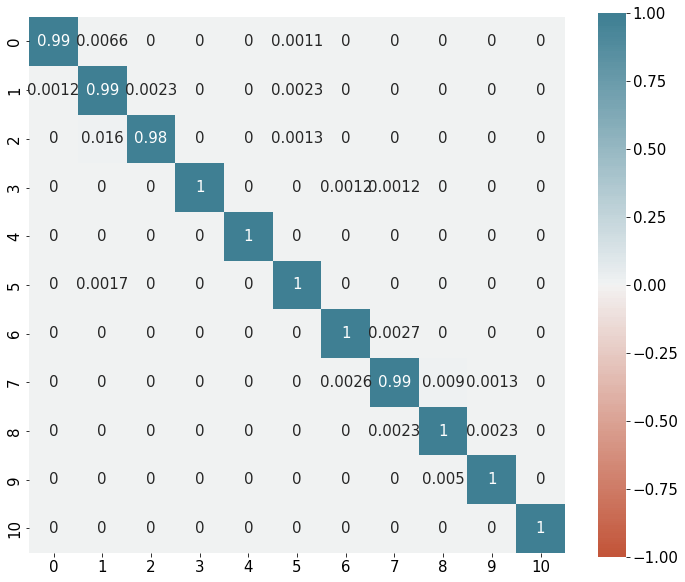

In [10]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.rcParams.update({'font.size': 15, 'figure.figsize': (10, 8)})
plt.figure(figsize=(12,10))
# Generate the heatmap
ax = sns.heatmap(confusion_matrix(pre_y, true_y,normalize='true'),
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 annot = True,
 #fmt="d"
                )